In [2]:
#importing some libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
#displaying all columns
pd.set_option('display.max_columns', None)

#Reading the dataset
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Assessing the Data

In [4]:
#getting the shape of the data
df.shape

(1460, 81)

In [5]:
#information summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#descriptive statistics of the data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#displaying all rows
pd.set_option('display.max_rows', None)

#checking for missing values
df.isnull().sum()/len(df) * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [8]:
#checking for duplicates
df.duplicated().sum()

0

No duplicates where found in the data

In [9]:
# Houses with Basement having Full Bathrooms BedroomAbvGr	KitchenAbvGr
df.BsmtFullBath.value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [10]:
# Houses with Basement having Half Bathrooms
df.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [11]:
# Houses with Full Bathrooms
df.FullBath.value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [12]:
# Houses with Half Bathrooms
df.HalfBath.value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [13]:
# Houses with Above grade bedrooms
df.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [14]:
# Houses with Above grade Kitchens
df.KitchenAbvGr.value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

##### Problems seen
- Category variables (Id, MSSubClass, OverallQual, OverallCond, ) with Datatype int instead of string
- GarageYrBlt having datatype float instead of int
- SalePrice (continuous variable) having datatype int instead of float
- missing values (LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature)

#### Data Cleaning

##### Define:
- Drop columns (Alley, FireplaceQu, PoolQC, Fence, MiscFeature) due to presence of lots of missing values
- Impute missing values with 'other' in LotFrontage column due to significant amount of missing values
- Impute missing values with mode in categorical columns (MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, GarageFinish, GarageType, GarageQual, GarageCond)
- Impute missing values with median in numerical column MasVnrArea
- Drop missing values in GarageYrBlt column
- Change category variables (Id, MSSubClass, OverallQual, OverallCond) with Datatype int to string
- Change GarageYrBlt column datatype from float to int
- Change SalePrice (continuous variable) datatype from int to float

In [15]:
#1 Drop columns (Alley, FireplaceQu, PoolQC, Fence, MiscFeature)
df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], 
        inplace=True)

#testing change
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [16]:
#2 Impute missing values with 'other' in LotFrontage column
df['LotFrontage'] = df['LotFrontage'].fillna('Other')

In [17]:
#testing change
df['LotFrontage'].value_counts()[:5]

Other    259
60.0     143
70.0      70
80.0      69
50.0      57
Name: LotFrontage, dtype: int64

In [18]:
#3 Impute missing values with mode in categorical columns (MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, GarageFinish, GarageQual, GarageCond)
cat_cols= ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for i in cat_cols:
    df[i] = df[i].fillna(df[i].value_counts().index[0])

In [19]:
#testing change
df[cat_cols].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [20]:
#4 Impute missing values with median in numerical column MasVnrArea
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [22]:
#testing change
df['MasVnrArea'].isnull().sum()

0

In [26]:
#5 Drop missing values in GarageYrBlt column
df.dropna(axis=0, inplace=True)
df['GarageYrBlt'].isnull().sum()

0

In [27]:
#6 Change category variables (Id, MSSubClass, OverallQual, OverallCond) with Datatype int to string
cat_cols = ['Id', 'MSSubClass', 'OverallQual', 'OverallCond']
for i in cat_cols:
    df[i] = df[i].astype(str)

In [28]:
#testing change
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1379 non-null   object
 1   MSSubClass   1379 non-null   object
 2   OverallQual  1379 non-null   object
 3   OverallCond  1379 non-null   object
dtypes: object(4)
memory usage: 53.9+ KB


In [29]:
#7 Change GarageYrBlt column datatype from float to int
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)
df['GarageYrBlt'].dtype

dtype('int64')

In [30]:
#8 Change SalePrice (continuous variable) datatype from int to float
df['SalePrice'] = df['SalePrice'].astype(float)
df['SalePrice'].dtype

dtype('float64')

In [31]:
#viewing clean data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1379 non-null   object 
 1   MSSubClass     1379 non-null   object 
 2   MSZoning       1379 non-null   object 
 3   LotFrontage    1379 non-null   object 
 4   LotArea        1379 non-null   int64  
 5   Street         1379 non-null   object 
 6   LotShape       1379 non-null   object 
 7   LandContour    1379 non-null   object 
 8   Utilities      1379 non-null   object 
 9   LotConfig      1379 non-null   object 
 10  LandSlope      1379 non-null   object 
 11  Neighborhood   1379 non-null   object 
 12  Condition1     1379 non-null   object 
 13  Condition2     1379 non-null   object 
 14  BldgType       1379 non-null   object 
 15  HouseStyle     1379 non-null   object 
 16  OverallQual    1379 non-null   object 
 17  OverallCond    1379 non-null   object 
 18  YearBuil

In [32]:
#shape of cleaned data
df.shape

(1379, 76)

#### Exploratory Data Analysis

In [33]:
#making a copy of our clean data
data = df.copy()

##### Numerical data

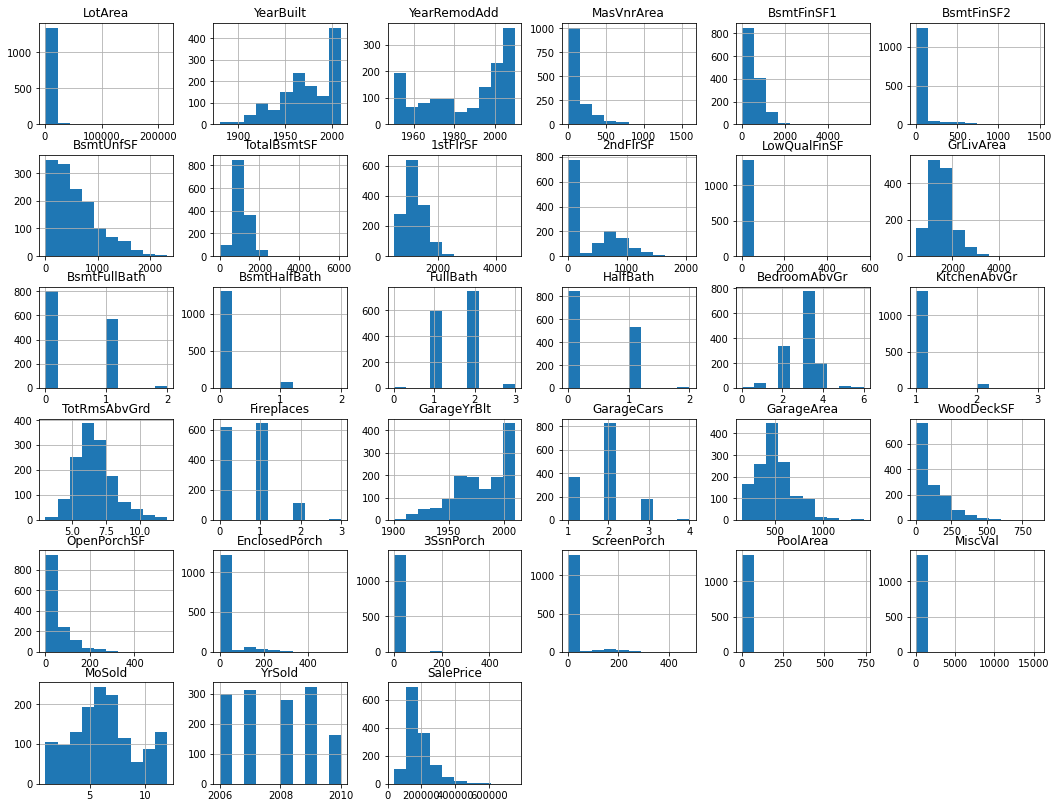

In [34]:
#viewing the distribution of some columns
data.hist(figsize=(18,14));

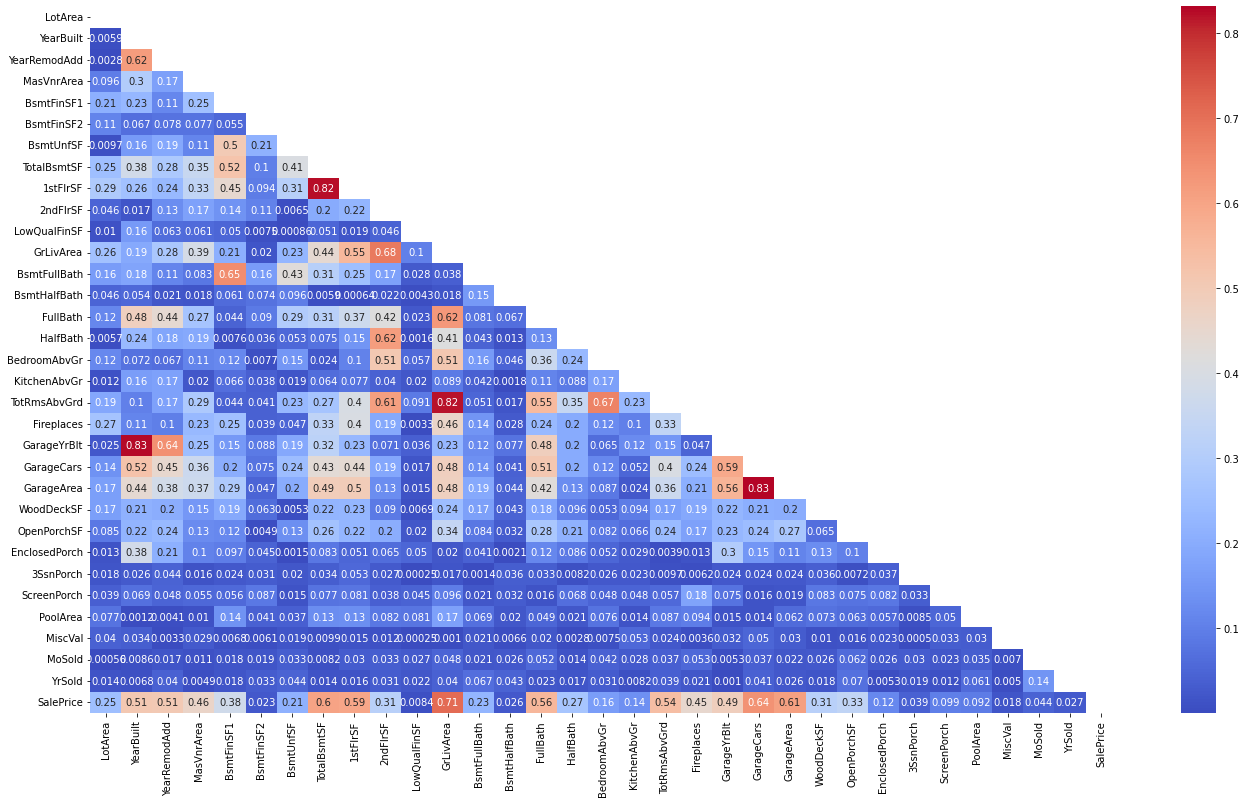

In [39]:
#seeing correlation between numerical columns
plt.figure(figsize=(23,13))
mask = np.triu(data.corr())
sns.heatmap(data.corr().abs(), annot = True, mask = mask, cmap ='coolwarm');

There're lot of columns correlated to our target column(SalePrice). And we have a no of columns correlated with each other.
- Garage cars and garage area are highly correlated with one another, so we'll remove one - GarageArea
- TotRmsAbvGrd(Total rooms above grade) and GrLivArea(Above grade (ground) living area square feet) are also highly correlated, so we'll drop one - TotRmsAbvGrd
- 1stFlrSF (First Floor square feet) is highly correlated with TotalBsmtSF(Total square feet of basement area), we'll drop TotalBsmtSF

In [40]:
#create copy of data without dropping any columns
data1 = data.copy()

In [41]:
#drop specified columns
data.drop(columns=['GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF'], inplace=True)
data.shape

(1379, 73)

We'll view specifically the correlation of the remaining columns to our target variable

In [46]:
data.corr().abs()['SalePrice'].sort_values(ascending=False) 

SalePrice        1.000000
GrLivArea        0.708172
GarageCars       0.637095
1stFlrSF         0.594935
FullBath         0.556550
YearBuilt        0.507584
YearRemodAdd     0.505434
GarageYrBlt      0.486362
MasVnrArea       0.463139
Fireplaces       0.448877
BsmtFinSF1       0.375563
OpenPorchSF      0.333036
2ndFlrSF         0.313336
WoodDeckSF       0.312631
HalfBath         0.270721
LotArea          0.252921
BsmtFullBath     0.225988
BsmtUnfSF        0.213135
BedroomAbvGr     0.164655
KitchenAbvGr     0.135574
EnclosedPorch    0.120164
ScreenPorch      0.099453
PoolArea         0.091518
MoSold           0.043749
3SsnPorch        0.039226
YrSold           0.026726
BsmtHalfBath     0.025651
BsmtFinSF2       0.023243
MiscVal          0.017933
LowQualFinSF     0.008364
Name: SalePrice, dtype: float64

We'll remove columns whose correlation is less than 0.9

In [47]:
#creating a copy of data where these columns aren't removed
data2 = data.copy()

In [55]:
#columns to drop
cols = data.corr().abs()['SalePrice'].sort_values(ascending=False).index[-7:]

In [58]:
data.drop(columns=cols, inplace=True)

In [60]:
data.shape

(1379, 66)

##### Categorical data
Finding correlations between our categorical data

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1379 non-null   object 
 1   MSSubClass     1379 non-null   object 
 2   MSZoning       1379 non-null   object 
 3   LotFrontage    1379 non-null   object 
 4   LotArea        1379 non-null   int64  
 5   Street         1379 non-null   object 
 6   LotShape       1379 non-null   object 
 7   LandContour    1379 non-null   object 
 8   Utilities      1379 non-null   object 
 9   LotConfig      1379 non-null   object 
 10  LandSlope      1379 non-null   object 
 11  Neighborhood   1379 non-null   object 
 12  Condition1     1379 non-null   object 
 13  Condition2     1379 non-null   object 
 14  BldgType       1379 non-null   object 
 15  HouseStyle     1379 non-null   object 
 16  OverallQual    1379 non-null   object 
 17  OverallCond    1379 non-null   object 
 18  YearBuil

MSSubClass categories
- 20: 1-STORY 1946 & NEWER ALL STYLES
- 30: 1-STORY 1945 & OLDER
- 40: 1-STORY W/FINISHED ATTIC ALL AGES
- 45: 1-1/2 STORY - UNFINISHED ALL AGES
- 50: 1-1/2 STORY FINISHED ALL AGES
- 60: 2-STORY 1946 & NEWER
- 70: 2-STORY 1945 & OLDER
- 75: 2-1/2 STORY ALL AGES
- 80: SPLIT OR MULTI-LEVEL
- 85: SPLIT FOYER
- 90: DUPLEX - ALL STYLES AND AGES
- 120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 150: 1-1/2 STORY PUD - ALL AGES
- 160: 2-STORY PUD - 1946 & NEWER
- 180: PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
- 190: 2 FAMILY CONVERSION - ALL STYLES AND AGES

In [67]:
MSSub_Classes = ['10', '20', '30', '40', '45', '50', '60', '70', '75', '80', '85', '90', '120', '150', '160', '180', '190']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=MSSub_Classes)
#data.MSSubClass.astype(vclasses)